In [1]:
#load packages
#%matplotlib inline

import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from skimage.io import imread, imshow
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import StratifiedKFold

import cv2

import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential, Model


import matplotlib.pyplot as plt
import seaborn as sns

import glob, os
from PIL import Image

In [2]:
#path to data

TRAIN_LABELS_PATH = './data/street-view-getting-started-with-julia/TrainLabelsExtended.csv'
TRAIN_IMG_PATH = './data/street-view-getting-started-with-julia/trainResized/'
TEST_IMG_PATH = './data/street-view-getting-started-with-julia/testResized/'

In [3]:
train_df = pd.read_csv(TRAIN_LABELS_PATH)
train_df

,ID,Class
0,5944,H
1,11109,Y
2,11177,Y
3,1380,I
4,9773,F
...,...,...
18737,10112,K
18738,4076,S
18739,2999,S
18740,5404,h


### Encode labels

#### Label Encoding

In [4]:
train_df_enc = train_df.copy()

In [5]:
label_enc = LabelEncoder()
train_df_enc['Label'] = label_enc.fit_transform(train_df_enc['Class'])
train_df_enc

,ID,Class,Label
0,5944,H,17
1,11109,Y,34
2,11177,Y,34
3,1380,I,18
4,9773,F,15
...,...,...,...
18737,10112,K,20
18738,4076,S,28
18739,2999,S,28
18740,5404,h,43


In [6]:
replaced_labels = dict(enumerate(label_enc.classes_))
# replaced_labels

### Functions

In [143]:
def check_grey_imgs(df_col):
    grey_imgs = []
    for n, img in enumerate(df_col.values.flatten()):

        try:
            img_cnt = tf.io.read_file(img)
            img_cnt = tf.io.decode_image(img_cnt, channels=3)
        except:
            print(img)
            grey_imgs.append(img)
    return grey_imgs


def transform_image(img):
    img_cnt = tf.io.read_file(img)
    img_cnt = tf.io.decode_image(img_cnt, channels=3).numpy().astype(float)
#     img_cnt = imread(img, as_gray=False)
    img_cnt /= 255

    return img_cnt


### Prepare dataframe

In [391]:
train_df_enc['img'] = [TRAIN_IMG_PATH + str(id_) + '.Bmp' for id_ in train_df_enc['ID'].values]
train_df_enc

,ID,Class,Label,img
0,5944,H,17,./data/street-view-getting-started-with-julia/...
1,11109,Y,34,./data/street-view-getting-started-with-julia/...
2,11177,Y,34,./data/street-view-getting-started-with-julia/...
3,1380,I,18,./data/street-view-getting-started-with-julia/...
4,9773,F,15,./data/street-view-getting-started-with-julia/...
...,...,...,...,...
18737,10112,K,20,./data/street-view-getting-started-with-julia/...
18738,4076,S,28,./data/street-view-getting-started-with-julia/...
18739,2999,S,28,./data/street-view-getting-started-with-julia/...
18740,5404,h,43,./data/street-view-getting-started-with-julia/...


#### Check images

In [35]:
# def check_grey_imgs(df_col):
#     grey_imgs = []
#     for n, img in enumerate(df_col.values.flatten()):

#         try:
#             img_cnt = tf.io.read_file(img)
#             img_cnt = tf.io.decode_image(img_cnt, channels=3)
#         except:
#             print(img)
#             grey_imgs.append(img)
#     return grey_imgs

In [398]:
check_grey_imgs(train_df_enc[['img']])

[]

#### Split data


In [9]:
X_train, X_test, y_train, y_test = train_test_split(train_df_enc[['img']], train_df_enc[['Label']], 
                                                    test_size=0.2, random_state=42)

In [10]:
X_train.values.flatten()[:5]

array(['./data/street-view-getting-started-with-julia/trainResized/5261.Bmp',
       './data/street-view-getting-started-with-julia/trainResized/15160.Bmp',
       './data/street-view-getting-started-with-julia/trainResized/16055.Bmp',
       './data/street-view-getting-started-with-julia/trainResized/11381.Bmp',
       './data/street-view-getting-started-with-julia/trainResized/5048.Bmp'],
      dtype=object)

In [23]:
X_train

,img
3577,./data/street-view-getting-started-with-julia/...
2493,./data/street-view-getting-started-with-julia/...
5007,./data/street-view-getting-started-with-julia/...
12833,./data/street-view-getting-started-with-julia/...
15953,./data/street-view-getting-started-with-julia/...
...,...
11284,./data/street-view-getting-started-with-julia/...
11964,./data/street-view-getting-started-with-julia/...
5390,./data/street-view-getting-started-with-julia/...
860,./data/street-view-getting-started-with-julia/...


In [11]:
y_train

,Label
3577,22
2493,42
5007,46
12833,39
15953,24
...,...
11284,61
11964,36
5390,61
860,16


#### Get image arrays

In [41]:
# def transform_image(img):
#     img_cnt = tf.io.read_file(img)
#     img_cnt = tf.io.decode_image(img_cnt, channels=3).numpy().astype(float)
# #     img_cnt = imread(img, as_gray=False)
#     img_cnt /= 255

#     return img_cnt


    

In [24]:
#%%time
X_train_ = np.asarray([transform_image(i).tolist() for i in X_train.values.flatten()])
X_test_ = np.asarray([transform_image(i).tolist() for i in X_test.values.flatten()])
X_train_.shape, X_test_.shape

Wall time: 1min 3s


((14993, 20, 20, 3), (3749, 20, 20, 3))

In [33]:
y_train_= y_train.values
y_test_ = y_test.values

#### Save transformed data

In [40]:
# np.savez('transformed_data', X_train_ = X_train_, X_test_ = X_test_, y_train_ = y_train_, y_test_ = y_test_)

#### Load transformed data

In [7]:
transformed_data = np.load('transformed_data.npz')

In [8]:
transformed_data.files

['X_train_', 'X_test_', 'y_train_', 'y_test_']

In [9]:
X_train_ = transformed_data[transformed_data.files[0]] 
X_test_ = transformed_data[transformed_data.files[1]]
y_train_ = transformed_data[transformed_data.files[2]].flatten()
y_test_ = transformed_data[transformed_data.files[3]].flatten()

In [10]:
X_train_

array([[[[0.89803922, 0.85882353, 0.21176471],
         [0.89411765, 0.84705882, 0.2       ],
         [0.88235294, 0.85098039, 0.2       ],
         ...,
         [0.87058824, 0.83529412, 0.19607843],
         [0.87843137, 0.84313725, 0.19607843],
         [0.85882353, 0.82352941, 0.18431373]],

        [[0.89411765, 0.85882353, 0.21176471],
         [0.89411765, 0.85098039, 0.19607843],
         [0.88235294, 0.85490196, 0.19607843],
         ...,
         [0.83529412, 0.81176471, 0.18039216],
         [0.85490196, 0.82745098, 0.17647059],
         [0.85098039, 0.81960784, 0.18823529]],

        [[0.89019608, 0.85490196, 0.20392157],
         [0.88235294, 0.83921569, 0.18039216],
         [0.85490196, 0.82745098, 0.16862745],
         ...,
         [0.80392157, 0.78431373, 0.18039216],
         [0.79215686, 0.77647059, 0.14509804],
         [0.80392157, 0.77254902, 0.15686275]],

        ...,

        [[0.8745098 , 0.84313725, 0.21568627],
         [0.85098039, 0.82745098, 0.21568627]

### CNN baseline

In [121]:
num_classes = len(np.unique(y_train_))

model = Sequential([
    layers.Conv2D(20, (3, 3), padding= 'same', activation='relu', input_shape=(20, 20, 3)),
    layers.BatchNormalization(),
    layers.Conv2D(20, (3, 3), padding= 'same', activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.2),
    layers.Conv2D(32, (3, 3), padding= 'same', activation='relu'),
    layers.BatchNormalization(),
    layers.Conv2D(32, (3, 3), padding= 'same', activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.2),
    layers.Conv2D(64, (3, 3), padding= 'same', activation='relu'),
    layers.Conv2D(64, (3, 3), padding= 'same', activation='relu'),
    layers.BatchNormalization(),
#     layers.Conv2D(64, (3, 3), padding= 'same', activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.4),
#     layers.Conv2D(128, (3, 3), padding= 'same', activation='relu'),
#     layers.Conv2D(128, (3, 3), padding= 'same', activation='relu'),
#     layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.4),
    layers.Dense(num_classes)
])

In [122]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy', 'categorical_accuracy'])

In [123]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_18 (Conv2D)           (None, 20, 20, 20)        560       
_________________________________________________________________
batch_normalization_18 (Batc (None, 20, 20, 20)        80        
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 20, 20, 20)        3620      
_________________________________________________________________
batch_normalization_19 (Batc (None, 20, 20, 20)        80        
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 10, 10, 20)        0         
_________________________________________________________________
dropout_12 (Dropout)         (None, 10, 10, 20)        0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 10, 10, 32)       

In [52]:
history = model.fit(X_train_, y_train_, epochs=15,# batch_size=64,
                    validation_data=(X_test_, y_test_))

Train on 14993 samples, validate on 3749 samples
Epoch 1/15
14993/14993 [==============================] - 41s 3ms/sample - loss: 4.3885 - accuracy: 0.0355 - categorical_accuracy: 0.0217 - val_loss: 3.5885 - val_accuracy: 0.0990 - val_categorical_accuracy: 0.0787
Epoch 2/15
14993/14993 [==============================] - 39s 3ms/sample - loss: 3.1127 - accuracy: 0.1906 - categorical_accuracy: 0.0149 - val_loss: 2.1246 - val_accuracy: 0.4681 - val_categorical_accuracy: 0.0035
Epoch 3/15
14993/14993 [==============================] - 40s 3ms/sample - loss: 2.0948 - accuracy: 0.4190 - categorical_accuracy: 0.0147 - val_loss: 1.4249 - val_accuracy: 0.6076 - val_categorical_accuracy: 0.0256
Epoch 4/15
14993/14993 [==============================] - 40s 3ms/sample - loss: 1.5938 - accuracy: 0.5443 - categorical_accuracy: 0.0167 - val_loss: 1.0511 - val_accuracy: 0.6965 - val_categorical_accuracy: 0.0056
Epoch 5/15
14993/14993 [==============================] - 46s 3ms/sample - loss: 1.2952 - a

### Stratified KFold

In [124]:
k_fold = StratifiedKFold(n_splits=5, random_state=12, shuffle=True)

In [125]:
test_acc_arr = []

for k_train_index, k_val_index in k_fold.split(X_train_, y_train_):
    
    model.fit(X_train_[k_train_index,:], y_train_[k_train_index], 
              epochs=8, 
              validation_data=(X_train_[k_val_index,:], y_train_[k_val_index]))
    
    test_loss, test_acc, _ = model.evaluate(X_test_, y_test_,  verbose=2)
    test_acc_arr.append(test_acc)


Train on 11994 samples, validate on 2999 samples
Epoch 1/8
11994/11994 [==============================] - 34s 3ms/sample - loss: 4.5646 - accuracy: 0.0258 - categorical_accuracy: 0.0194 - val_loss: 4.1041 - val_accuracy: 0.0383 - val_categorical_accuracy: 0.0247
Epoch 2/8
11994/11994 [==============================] - 31s 3ms/sample - loss: 3.7699 - accuracy: 0.0952 - categorical_accuracy: 0.0143 - val_loss: 2.8362 - val_accuracy: 0.2941 - val_categorical_accuracy: 0.0273
Epoch 3/8
11994/11994 [==============================] - 31s 3ms/sample - loss: 2.6573 - accuracy: 0.2943 - categorical_accuracy: 0.0166 - val_loss: 1.7453 - val_accuracy: 0.5539 - val_categorical_accuracy: 0.0123
Epoch 4/8
11994/11994 [==============================] - 31s 3ms/sample - loss: 1.9608 - accuracy: 0.4511 - categorical_accuracy: 0.0155 - val_loss: 1.2619 - val_accuracy: 0.6702 - val_categorical_accuracy: 0.0110
Epoch 5/8
11994/11994 [==============================] - 31s 3ms/sample - loss: 1.5778 - accura

Epoch 5/8
11995/11995 [==============================] - 32s 3ms/sample - loss: 0.3355 - accuracy: 0.8954 - categorical_accuracy: 0.0162 - val_loss: 0.1391 - val_accuracy: 0.9590 - val_categorical_accuracy: 0.0173
Epoch 6/8
11995/11995 [==============================] - 31s 3ms/sample - loss: 0.3269 - accuracy: 0.8964 - categorical_accuracy: 0.0154 - val_loss: 0.1329 - val_accuracy: 0.9563 - val_categorical_accuracy: 0.0167
Epoch 7/8
11995/11995 [==============================] - 31s 3ms/sample - loss: 0.3389 - accuracy: 0.8912 - categorical_accuracy: 0.0156 - val_loss: 0.1375 - val_accuracy: 0.9553 - val_categorical_accuracy: 0.0217
Epoch 8/8
11995/11995 [==============================] - 32s 3ms/sample - loss: 0.3163 - accuracy: 0.8972 - categorical_accuracy: 0.0169 - val_loss: 0.1333 - val_accuracy: 0.9566 - val_categorical_accuracy: 0.0163
3749/3749 - 2s - loss: 0.2896 - accuracy: 0.9261 - categorical_accuracy: 0.0192


In [126]:
test_acc_arr

[0.8092825, 0.8460923, 0.9039744, 0.9223793, 0.9261136]

#### Evaluate model

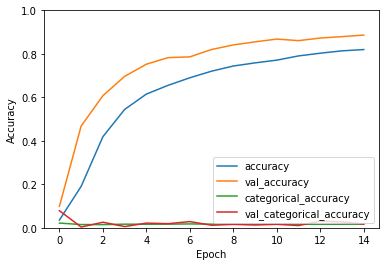

In [101]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.plot(history.history['categorical_accuracy'], label='categorical_accuracy')
plt.plot(history.history['val_categorical_accuracy'], label = 'val_categorical_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')

# test_loss, test_acc = model.evaluate(X_test_, y_test_,  verbose=2)

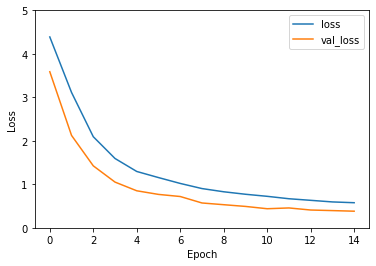

In [102]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim([0, 5])
plt.legend(loc='upper right')
plt.show()

In [103]:
test_loss, test_acc, _ = model.evaluate(X_test_, y_test_,  verbose=2)
test_acc

3749/3749 - 2s - loss: 0.3027 - accuracy: 0.9176 - categorical_accuracy: 0.0128


0.91757804

#### Make predictions

In [127]:
pred = model.predict(X_test_)
pred.shape

(3749, 62)

In [128]:
pred_labels = np.asarray([np.argmax(i) for i in pred])


#### invert labels

In [129]:
y_test_inv = label_enc.inverse_transform(y_test_)
pred_labels_inv = label_enc.inverse_transform(pred_labels)


In [130]:
print(classification_report(y_test_inv, pred_labels_inv))

              precision    recall  f1-score   support

           0       0.75      0.95      0.84        57
           1       0.97      0.95      0.96        41
           2       0.98      0.98      0.98        55
           3       1.00      1.00      1.00        65
           4       0.98      1.00      0.99        64
           5       0.97      1.00      0.98        64
           6       0.98      0.98      0.98        56
           7       1.00      0.98      0.99        59
           8       1.00      1.00      1.00        61
           9       0.96      1.00      0.98        52
           A       0.87      0.89      0.88        70
           B       0.91      0.98      0.95        44
           C       0.75      0.91      0.82        56
           D       0.93      0.92      0.93        62
           E       0.98      0.91      0.95        68
           F       0.92      0.98      0.95        49
           G       0.87      0.97      0.91        61
           H       0.80    

In [131]:
# confusion_matrix(y_test_, pred_labels)

In [132]:
result_df = pd.DataFrame()
result_df['y_test'] = y_test_inv
result_df['predicted'] = pred_labels_inv
result_df

,y_test,predicted
0,X,X
1,p,p
2,l,I
3,G,G
4,p,p
...,...,...
3744,l,l
3745,s,S
3746,r,r
3747,t,t


In [133]:
def check_and_plot(num):
    print(result_df.loc[num])
    imshow(X_test_[num])
    plt.show()

y_test       G
predicted    G
Name: 3, dtype: object


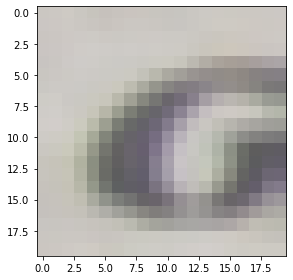

In [134]:
check_and_plot(3)

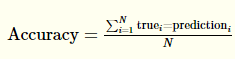

In [135]:
class_accuracy = (result_df['y_test'] == result_df['predicted']).sum() / len(result_df)

In [136]:
class_accuracy

0.9261136303014137

### Prepare data for submission

In [65]:
def get_imnames():
    txtfiles = []
    for file in glob.glob(TEST_IMG_PATH + "*.Bmp"):
        file = file.split('\\')[-1][:-4] #get only filename
        txtfiles.append(file)
        
    return txtfiles

In [29]:
txtfiles = get_imnames()
len(txtfiles)

6220

In [30]:
presub_df = pd.DataFrame()
presub_df['id'] = txtfiles
presub_df['id'] = pd.to_numeric(presub_df['id'])
presub_df['img'] = [TEST_IMG_PATH + str(id_) + '.Bmp' for id_ in presub_df['id'].values]
presub_df.sort_values(by=['id'], inplace=True)
presub_df.reset_index(inplace=True, drop=True)

In [31]:

presub_df

,id,img
0,6284,./data/street-view-getting-started-with-julia/...
1,6285,./data/street-view-getting-started-with-julia/...
2,6286,./data/street-view-getting-started-with-julia/...
3,6287,./data/street-view-getting-started-with-julia/...
4,6288,./data/street-view-getting-started-with-julia/...
...,...,...
6215,12499,./data/street-view-getting-started-with-julia/...
6216,12500,./data/street-view-getting-started-with-julia/...
6217,12501,./data/street-view-getting-started-with-julia/...
6218,12502,./data/street-view-getting-started-with-julia/...


#### Check grey imgs

In [36]:
grey_imgs = check_grey_imgs(presub_df[['img']])
grey_imgs

[]

In [37]:
#rewrite imgs
for im in grey_imgs:
    img_cnt = imread(im)
    rgb_img_arr = cv2.cvtColor(img_cnt, cv2.COLOR_GRAY2RGB)
    rgb_img = Image.fromarray(rgb_img_arr)
    os.remove(im)
    rgb_img.save(im)
    
   

In [38]:
check_grey_imgs(presub_df[['img']])

[]

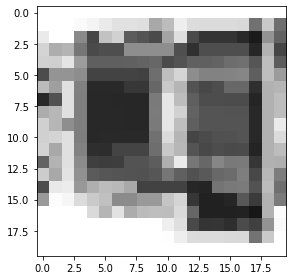

In [39]:
imshow('./data/street-view-getting-started-with-julia/testResized/7318.Bmp');

In [42]:
X_sub = np.asarray([transform_image(i).tolist() for i in presub_df['img'].values])
X_sub.shape

(6220, 20, 20, 3)

### Submit prediction

In [137]:
sub_predict = model.predict(X_sub)
sub_labels = np.asarray([np.argmax(i) for i in sub_predict])
sub_labels

array([17, 14,  1, ..., 27, 23, 22], dtype=int64)

In [138]:
sub_labels_inv = label_enc.inverse_transform(sub_labels)
sub_labels_inv

array(['H', 'E', '1', ..., 'R', 'N', 'M'], dtype=object)

In [139]:
def diplay(num):
    print(sub_labels_inv[num])
    imshow(X_sub[num])
    plt.show()

1


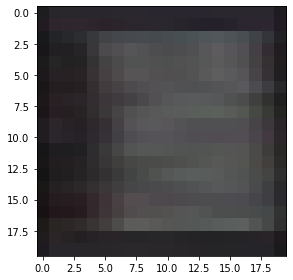

In [140]:
diplay(2)

### Create submission file


In [141]:
sub_df = pd.DataFrame()
sub_df['ID'] = presub_df['id']
sub_df['Class'] = sub_labels_inv
sub_df.set_index('ID', inplace=True)
sub_df

,Class
ID,
6284,H
6285,E
6286,1
6287,U
6288,T
...,...
12499,0
12500,o
12501,R


In [142]:
sub_df.to_csv('submission.csv')

In [99]:
idx = np.argmax(pred[2])
idx

18

In [100]:
replaced_labels[idx]

'I'

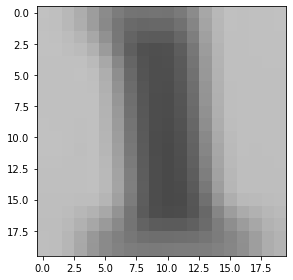

In [101]:
imshow(X_test_[2])

In [15]:
X_train_[0]

array([[[0.89803922, 0.85882353, 0.21176471],
        [0.89411765, 0.84705882, 0.2       ],
        [0.88235294, 0.85098039, 0.2       ],
        ...,
        [0.87058824, 0.83529412, 0.19607843],
        [0.87843137, 0.84313725, 0.19607843],
        [0.85882353, 0.82352941, 0.18431373]],

       [[0.89411765, 0.85882353, 0.21176471],
        [0.89411765, 0.85098039, 0.19607843],
        [0.88235294, 0.85490196, 0.19607843],
        ...,
        [0.83529412, 0.81176471, 0.18039216],
        [0.85490196, 0.82745098, 0.17647059],
        [0.85098039, 0.81960784, 0.18823529]],

       [[0.89019608, 0.85490196, 0.20392157],
        [0.88235294, 0.83921569, 0.18039216],
        [0.85490196, 0.82745098, 0.16862745],
        ...,
        [0.80392157, 0.78431373, 0.18039216],
        [0.79215686, 0.77647059, 0.14509804],
        [0.80392157, 0.77254902, 0.15686275]],

       ...,

       [[0.8745098 , 0.84313725, 0.21568627],
        [0.85098039, 0.82745098, 0.21568627],
        [0.82352941, 0

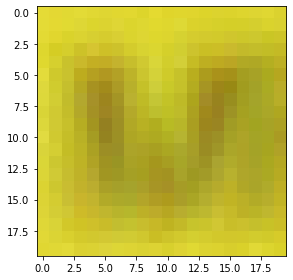

In [20]:
imshow(X_train_[0])

In [22]:
y_train

,Label
3577,22
2493,42
5007,46
12833,39
15953,24
...,...
11284,61
11964,36
5390,61
860,16


## Test

In [195]:
img_='./data/street-view-getting-started-with-julia/trainResized/3559.Bmp'

In [196]:
def display_image(id_):
    sample_img = TRAIN_IMG_PATH + str(id_) + '.Bmp'
    img= imread(sample_img)
    imshow(img);
    

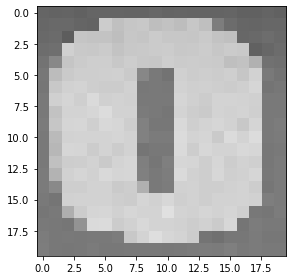

In [197]:
display_image(3559)

In [198]:
imread(img_)

array([[101,  99, 100,  98, 101, 101, 101, 100, 100, 103, 100, 101, 100,
        100, 100, 101,  97,  97, 100,  98],
       [103, 105, 105, 101,  99, 204, 192, 198, 200, 190, 194, 189, 199,
        191, 125, 108, 102, 101, 103, 103],
       [105, 107,  93, 197, 196, 196, 190, 199, 197, 203, 199, 199, 198,
        202, 195, 192, 103, 105, 109, 106],
       [109, 111, 208, 201, 200, 203, 196, 200, 201, 203, 204, 200, 201,
        204, 199, 203, 201,  97, 103, 108],
       [115, 136, 197, 203, 206, 206, 200, 205, 200, 199, 206, 203, 204,
        203, 202, 191, 194, 177, 113, 111],
       [119, 188, 202, 206, 206, 207, 208, 202, 135, 121, 115, 208, 204,
        206, 204, 207, 198, 210, 122, 115],
       [118, 200, 209, 211, 206, 204, 204, 209, 120, 121, 120, 210, 207,
        208, 206, 204, 207, 214, 116, 119],
       [121, 208, 213, 207, 218, 208, 210, 208, 122, 122, 122, 213, 208,
        204, 211, 211, 210, 208, 122, 121],
       [122, 194, 212, 212, 214, 220, 210, 210, 123, 121, 118, 2

In [155]:
transform_image(img_)

array([[[0.64313725, 0.17647059, 0.06666667],
        [0.67058824, 0.25882353, 0.09411765],
        [0.82352941, 0.48627451, 0.27058824],
        ...,
        [0.73333333, 0.52156863, 0.24705882],
        [0.7372549 , 0.5254902 , 0.25098039],
        [0.71764706, 0.50980392, 0.23529412]],

       [[0.63529412, 0.2       , 0.07843137],
        [0.74509804, 0.38039216, 0.19215686],
        [0.83921569, 0.54509804, 0.30588235],
        ...,
        [0.73333333, 0.52941176, 0.23529412],
        [0.73333333, 0.52941176, 0.24313725],
        [0.70588235, 0.50588235, 0.21176471]],

       [[0.7254902 , 0.34509804, 0.15686275],
        [0.83529412, 0.53333333, 0.28235294],
        [0.78039216, 0.52941176, 0.23529412],
        ...,
        [0.70588235, 0.50196078, 0.23529412],
        [0.72941176, 0.53333333, 0.2627451 ],
        [0.71372549, 0.5254902 , 0.24705882]],

       ...,

       [[0.74509804, 0.5372549 , 0.24313725],
        [0.74117647, 0.52156863, 0.24705882],
        [0.72156863, 0

In [103]:
img_cnt = tf.io.read_file(img_)


In [104]:
img_cnt = tf.io.decode_bmp(img_cnt, channels=3).numpy().astype(float)

InvalidArgumentError: channels attribute 3 does not match bits per pixel from file 1 [Op:DecodeBmp]

In [67]:
img_cnt

array([[[148.,  24.,  33.],
        [152.,  25.,  31.],
        [169.,  52.,  68.],
        ...,
        [152.,  20.,  30.],
        [154.,  23.,  28.],
        [151.,  26.,  30.]],

       [[154.,  25.,  32.],
        [152.,  27.,  33.],
        [153.,  26.,  32.],
        ...,
        [151.,  27.,  33.],
        [148.,  28.,  33.],
        [153.,  28.,  34.]],

       [[152.,  27.,  31.],
        [155.,  26.,  32.],
        [153.,  23.,  35.],
        ...,
        [154.,  30.,  33.],
        [157.,  29.,  36.],
        [154.,  29.,  33.]],

       ...,

       [[ 52.,  28.,  31.],
        [105.,  22.,  22.],
        [ 88.,  26.,  41.],
        ...,
        [ 54.,  22.,  30.],
        [ 55.,  22.,  34.],
        [150.,  32.,  29.]],

       [[156.,  35.,  40.],
        [156.,  34.,  32.],
        [160.,  35.,  36.],
        ...,
        [153.,  30.,  29.],
        [157.,  35.,  33.],
        [155.,  30.,  28.]],

       [[161.,  35.,  38.],
        [161.,  31.,  35.],
        [164.,  

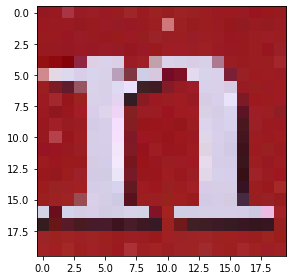

In [18]:
imshow(img_cnt.numpy())

In [19]:
img_cnt_norm = img_cnt / 255

In [79]:
img_cnt_norm

<tf.Tensor: shape=(20, 20, 3), dtype=float32, numpy=
array([[[0.5803922 , 0.09411765, 0.12941177],
        [0.59607846, 0.09803922, 0.12156863],
        [0.6627451 , 0.20392157, 0.26666668],
        ...,
        [0.59607846, 0.07843138, 0.11764706],
        [0.6039216 , 0.09019608, 0.10980392],
        [0.5921569 , 0.10196079, 0.11764706]],

       [[0.6039216 , 0.09803922, 0.1254902 ],
        [0.59607846, 0.10588235, 0.12941177],
        [0.6       , 0.10196079, 0.1254902 ],
        ...,
        [0.5921569 , 0.10588235, 0.12941177],
        [0.5803922 , 0.10980392, 0.12941177],
        [0.6       , 0.10980392, 0.13333334]],

       [[0.59607846, 0.10588235, 0.12156863],
        [0.60784316, 0.10196079, 0.1254902 ],
        [0.6       , 0.09019608, 0.13725491],
        ...,
        [0.6039216 , 0.11764706, 0.12941177],
        [0.6156863 , 0.11372549, 0.14117648],
        [0.6039216 , 0.11372549, 0.12941177]],

       ...,

       [[0.20392157, 0.10980392, 0.12156863],
        [0.4117

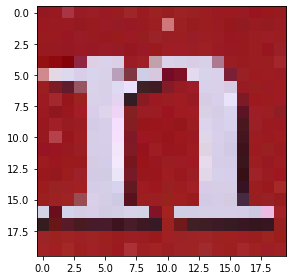

In [20]:
imshow(img_cnt_norm.numpy())

In [28]:
img_cnt_norm.numpy()

array([[[0.5803922 , 0.09411765, 0.12941177],
        [0.59607846, 0.09803922, 0.12156863],
        [0.6627451 , 0.20392157, 0.26666668],
        ...,
        [0.59607846, 0.07843138, 0.11764706],
        [0.6039216 , 0.09019608, 0.10980392],
        [0.5921569 , 0.10196079, 0.11764706]],

       [[0.6039216 , 0.09803922, 0.1254902 ],
        [0.59607846, 0.10588235, 0.12941177],
        [0.6       , 0.10196079, 0.1254902 ],
        ...,
        [0.5921569 , 0.10588235, 0.12941177],
        [0.5803922 , 0.10980392, 0.12941177],
        [0.6       , 0.10980392, 0.13333334]],

       [[0.59607846, 0.10588235, 0.12156863],
        [0.60784316, 0.10196079, 0.1254902 ],
        [0.6       , 0.09019608, 0.13725491],
        ...,
        [0.6039216 , 0.11764706, 0.12941177],
        [0.6156863 , 0.11372549, 0.14117648],
        [0.6039216 , 0.11372549, 0.12941177]],

       ...,

       [[0.20392157, 0.10980392, 0.12156863],
        [0.4117647 , 0.08627451, 0.08627451],
        [0.34509805, 0

In [29]:
label = tf.constant(7)
label

<tf.Tensor: shape=(), dtype=int32, numpy=7>

In [30]:
dataset =  tf.data.Dataset.from_tensor_slices((img_cnt_norm, label))
dataset

ValueError: Value tf.Tensor(7, shape=(), dtype=int32) has insufficient rank for batching.